# SALARY PREDICTOR

# # In this report we use the salary.csv file data to predict employee salaries from different employee characteristics (or features). This will be achieved through Statistical methods and Exploratory Data Analysis (EDA).

### In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task*. (https://medium.com/python-pandemonium/introduction-to-exploratory-data-analysis-in-python-8b6bcb55c190)

Below are the packages imported into this Notebook that will be used in the report to extract and visualize the data.

In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sns; sns.set
import statsmodels as sm
import csv
%matplotlib inline
from prettytable import PrettyTable
from scipy.stats.stats import pearsonr

Data from the Salary.csv file is imported as a pandas dataframe using Pandas pd.read_csv("") method. Below the data is imported and stored under the name data.

In [201]:
data = pd.read_csv("salary.csv")

The code and data visualization in the next few lines is shown with the aim to find details like the number of columns, rows and other metadata which will help us to gauge size and other properties such as the range of values in the columns of the data (salary) dataset.

We use the Pandas .head() and .tail() methods to display all the columns and only the first and last Five(5) rows of the dataset.

In [202]:
data.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


In [203]:
data.tail()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
509,45906.0,6,17,11,0.92,1,0,2,0,2,70
510,60402.0,6,19,7,0.86,1,0,3,0,1,72
511,53187.0,19,7,6,0.78,1,0,3,0,4,76
512,56542.0,8,20,10,0.78,1,0,3,0,2,78
513,52662.0,13,25,11,0.78,1,0,3,0,1,112


Below we use the Pandas Dataframe.describe() method to view some basic statistical details like percentile, mean, standard deviation etc.

In [204]:
data.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,513.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,50863.220098,2.926070,12.852140,7.052529,0.948521,0.964981,0.044747,2.132296,0.750973,2.529183,6.982490
std,12685.132358,4.791397,9.444695,6.414771,0.149380,0.184008,0.206950,0.820075,0.432871,1.127420,16.873156
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50096.000000,0.500000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60345.000000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


# QUESTION 1

## QUESTION A.

How many responders are there? Are there any missing values in any of the variables?

To the question, 'how many responders are there ?', we use the .shape method (below) on the data data dataframe (data.shape) as this this will show us that there are 514 rows. This means that there are 514 responders in the salary/data dataframe.

In [205]:
data.shape

(514, 11)

To the question, "Are there any missing values in any of the variables?", we use the .isnull(.values.any() where we find that it produces True, meaning that there is a missing value. We then use the .isnull().sum() method to count how many missing vaues there are and from which columns. We finf that the salary column is the only one with a missing value.

In [206]:
data.isnull().values.any()

True

In [207]:
data.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

## QUESTION B.

What is the lowest salary and highest salary in the group?

To ascertain the highest salary (96156.0) in the salary data set we use the .max() method on the data DataFrame and we do the same for the lowest salary (29000.0) but we use the .min() method on data instead. 

In [208]:
data['salary'].max()

96156.0

In [209]:
data['salary'].min()

29000.0

## QUESTION C. 

What is the mean salary for the sample? Include the standard error of the mean.

To get the mean of the salary column, we use the pandas .mean() function on the data DataFrame and we get a mean of 50863.22. 

In [210]:
data['salary'].mean()

50863.22009783626

To get the Standard Error Mean (sem), we use the pandas dataframe.sem() function return unbiased standard error of the mean over requested axis. We get a SEM of 560.06 of the salary column.

In [211]:
data['salary'].sem(axis = 0, skipna = True) 

560.0622753925232

## QUESTION D. 

What is the standard deviation for the years worked?

To get the Standard Deviation (std) of the "yearsworked" column, we use the pandas dataframe.std() [data['yearsworked'].std()] function return the standard deviation of the yearsworked column. We get a std of 9.44 of the yearsworked column.

In [212]:
data['yearsworked'].std()

9.444695144169813

## QUESTION E.

What is the median salary for the sample?

To get the Median of the "salary" column, we use the pandas dataframe.std() [data['salary'].median()] function return the median of the salary column. We get a median of 50096.0 of the salary column.

In [213]:
data['salary'].median()

50096.0

## QUESTION F.

What is the interquartile range for salary in the sample?

In descriptive statistics, the interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles,[1][2] IQR = Q3 −  Q1. (https://en.wikipedia.org/wiki/Interquartile_range)
The IQR for salary is (Q3(60345.0) - Q1(40000.0)) = 20345.0.

In [214]:
Q1 = data['salary'].quantile(.25)

In [215]:
print(Q1)

40000.0


In [216]:
Q3 = data['salary'].quantile(.75)

In [217]:
print(Q3)

60345.0


In [218]:
IQR = Q3 - Q1

In [219]:
print("The Interquartile Range is " + str(IQR))

The Interquartile Range is 20345.0


## QUESTION G. 

How many men are there in the sample? How many women are there in the sample? Present this information in a table. 

Below we make a change to the data DataFrame, particulary the "male" column by replacing all the 1's in the male column with the string 'Male' and the 0's with the string 'Female'.
Next we use the .head() method to check how the male column has changed and we can see that the column now has the string "Male" and "Female" instead of 1 or 0.
We then use the .loc function to select the male column and perform a value count to determine the number of males and females in the column.
We then use the PrettyTable package to create a table to display the count of male and females.

In [220]:
#Replace all 1 with 'Male' and 0 with 'Female'
data['male'] = data['male'].replace([1,0],['Male','Female'])

In [221]:
data.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,Male,3,0
1,58000.0,1,0,0,1.24,1,0,1,Male,2,0
2,45500.0,0,0,0,1.21,1,0,1,Male,3,2
3,35782.0,0,2,1,0.99,1,0,1,Male,4,1
4,34731.0,0,2,2,0.91,1,0,1,Male,4,1


In [222]:
data_m =  data.loc[data["male"] == 'Male']
print("There are " + str(data_m["male"].count()) + " males in the salary dataset sample")

There are 386 males in the salary dataset sample


In [223]:
data_f = data.loc[data["male"] == 'Female']
print("There are " + str(data_f["male"].count()) + " females in the salary dataset sample")

There are 128 females in the salary dataset sample


In [224]:
data['male'].value_counts()

Male      386
Female    128
Name: male, dtype: int64

In [225]:
from prettytable import PrettyTable
    
x = PrettyTable()
x.field_names = [" ", "Male", "Female"]
column_names = ["Male", "Female"]
x.add_row(["Count", 386, 128])
print(x)

+-------+------+--------+
|       | Male | Female |
+-------+------+--------+
| Count | 386  |  128   |
+-------+------+--------+


## QUESTION H. 

How many women are executives compared to men? 

Below we use the .replace function to replace 1, 2, 3 in the position column with the strings 'junior employee', 'manager' and 'Executive' respectively.
We then use the .head() method to check how the contents of the Position column has changed and we can see that the column now has the strings "junior employee", 'manager' and "executive" instead of 1, 2, or 3.
We then use the data_m and data_f dataframes along with the .loc function to select the Position column and perform a value count to determine the number of males and females in executive roles in the column. 
We are thus able to determine that there are 173 [192(males)-19(females)] more men than women in executive positions.


In [226]:
#Replace all 1 with 'Junior Employee', 2 with 'Manager' and 3 with 'Executive'.
data['position'] = data['position'].replace([1, 2, 3],['junior employee','manager', 'Executive'])

In [227]:
data.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,junior employee,Male,3,0
1,58000.0,1,0,0,1.24,1,0,junior employee,Male,2,0
2,45500.0,0,0,0,1.21,1,0,junior employee,Male,3,2
3,35782.0,0,2,1,0.99,1,0,junior employee,Male,4,1
4,34731.0,0,2,2,0.91,1,0,junior employee,Male,4,1


In [228]:
data_m["male"].loc[data["position"] == 'Executive'].count()

192

In [229]:
print("There are " + str(data_m["male"].loc[data["position"] == 'Executive'].count()) + " male executives")


There are 192 male executives


In [230]:
data_f["male"].loc[data["position"] == 'Executive'].count()

19

In [231]:
print("There are " + str(data_f["male"].loc[data["position"] == 'Executive'].count()) + " female executives")


There are 19 female executives


In [232]:
print("There are " +str(192-19) + " more male executives than female executives.")


There are 173 more male executives than female executives.


# QUESTION I. 

Create a histogram for the variable Salary.

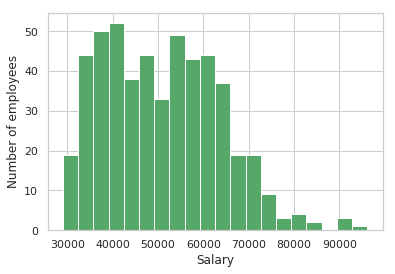

In [233]:
data['salary'].hist(color='g', bins=20, alpha=1.0)
plt.xlabel("Salary")
plt.ylabel("Number of employees")
plt.show()

## QUESTION J. 

Examine the histogram and describe the distribution for Salary.

The Salary's distribution is bimodal — it has two modes (roughly at 40 000 and 54 000) around which the observations are concentrated.
The salary distribution has a right skewed distribution. Most of the employees earn in the low/medium range of salaries, with a few exceptions in that are executives distributed along a large range (80 000 to 95 000) of higher salaries which constitute most of the outliers. Most of the employees within the organization earn between 30 000 and 75 000.

## QUESTION K. 

Create a bar graph to show the different average salaries of men and women. (Bonus: Add error bars to the bars showing the 95% confidence interval). What does the graph tell you about the difference between men and women’s salaries? 

Below we created a bar graph indicating the differences in average salaries between Male and Female with a confidence interval of 95% (ci = 95).

From the bar graph below, we can tell that Males have a higher average salary (around 54 000) than that of women(around 43 000).

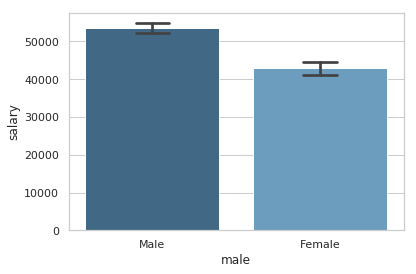

In [234]:
from numpy import mean
sns.set(style="whitegrid")
x =data.loc[:,'male']
ax = sns.barplot(x, y=data['salary'],capsize=.2, estimator=mean, ci=95, dodge=False, palette="Blues_d")

## QUESTION L. 

Create a scatterplot showing the relationship between Years Worked and Salary (don’t forget to insert a trend line).

Below we create a scatter plot using seaborn's sns.regplot() function.

The scatter plot shows a positive correlation between the "years_worked" and how high ones "salary" is.

There are a few outliers that we can see in the scatter plot. For instance the individual with the higest salary (about 97 000) doesnt have the most years worked (around 12) and also with the individual with the most years worked (over 40) has a salary (around 64000) which is below the trend indicated in the scatterplot. 

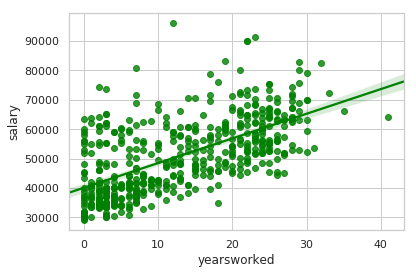

In [260]:
sns.regplot(x=data["yearsworked"], y=data["salary"], color="green")

# QUESTION M. 

In [285]:
data = pd.read_csv("salary.csv").dropna()

In [286]:
pearsonr(data['yearsworked'], data['salary'])

(0.6235888657598045, 1.2873351342921916e-56)

There is a positve pearsonr correlation between between "yearsworked" and "salary" as determined above using the pearsonr function.The line in the scatter plot above has a positive gradient signifying a positive correlation.

The p-value of 1.2873351342921916e-56 is less than 5% so the relationship is statistically significant.